Step 1 - Creating a supervised training set with Pocket App (Added Pocket extension in chrome extension)

Steps:

1. Add Pocket extension in chrome extension and create an account in Pocket.
2. Save as many articles both of interest and non interest with tags.
3. To create a Pocket API, which can transfer the articles to our application, we need to create an app in Pocket. Click on Create a New App, add name, select add, modify and retrive permissions, select appropriate platform and then click on create application
4. This gives a 'Consumer Key'. 
5. Next we need to create Authorization.

Reason for choosing Pocket 

1. Pocket is a service which helps to save the articles of interest with with a tag (y/n) and has a Pocket API with which we can transfer these stored articles to an application we are building

2. Easy to use the API: Quick authentication: With OAuth 2, users can connect to Pocket with just two taps and without having to enter their username and password. Within the Pocket API, there is 'Retrive' option (Also have add and modify options).

Alternative to using pocket - wallabag,  Raindrop.io , ArchiveBox. (Raindrop.io didnt have chrome extension for tagging), pocket was suggested as no.1


In [ ]:
import json as JSON
import pandas as pd
import requests
from urllib.parse import urlencode
from urllib.request import Request, urlopen

The Pocket Authentication API uses a variant of OAuth 2.0 for authentication. 
OAuth 2.0 is meant to be straightforward to implement, and also provides increased security for user authentication because 3rd party client apps no longer need to request or store a user's login information to authenticate with Pocket.

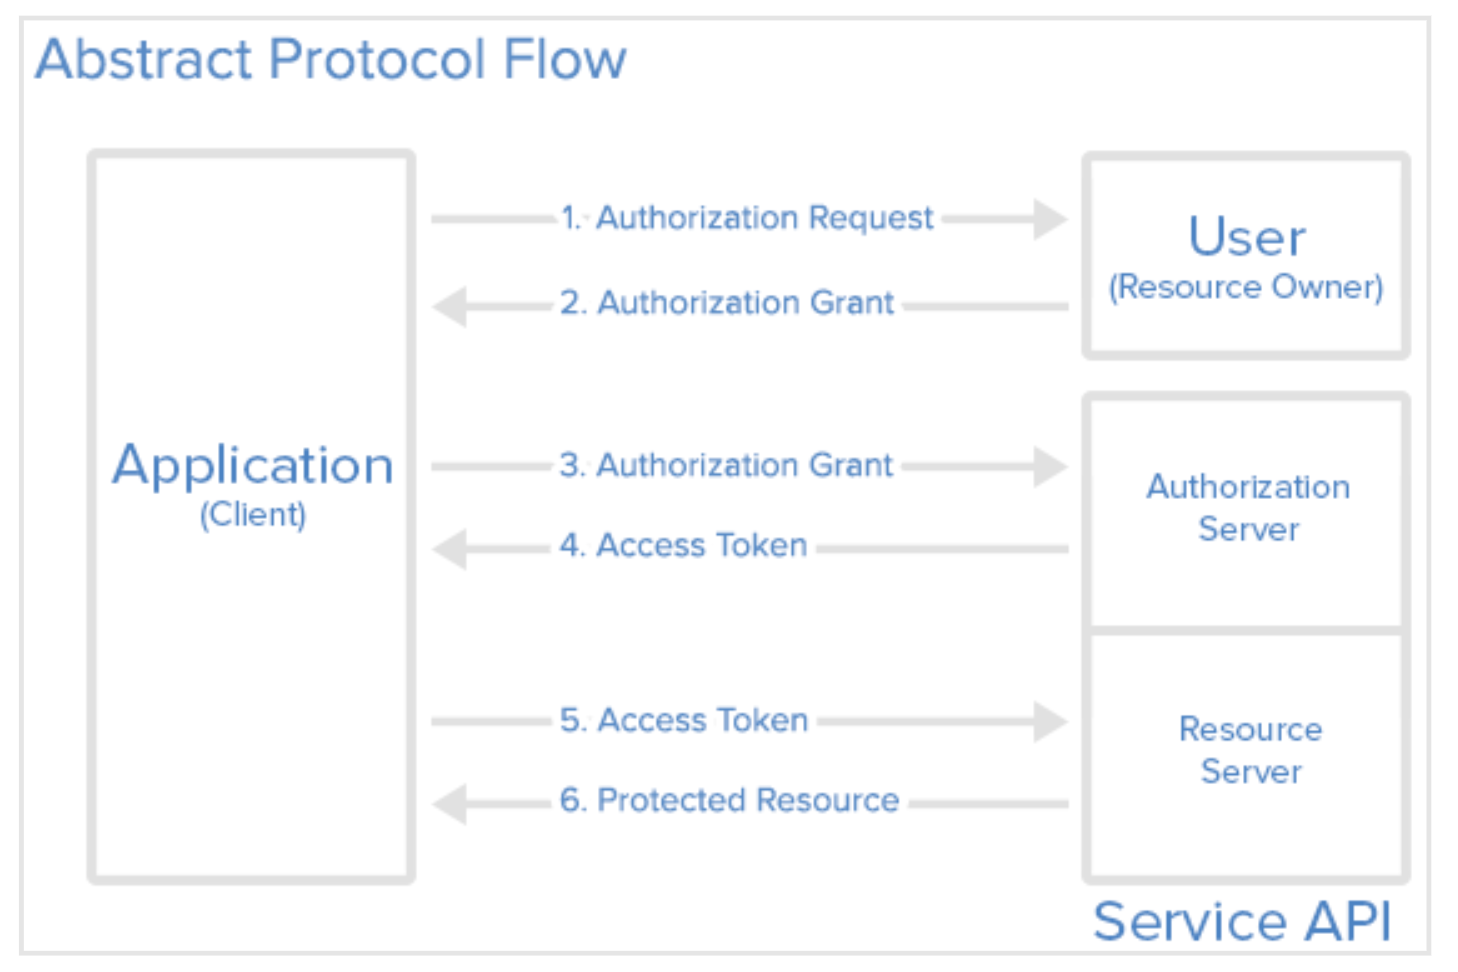

To Authrnticate with Pocket:
1. Step 1: Obtain a platform consumer key and request an authorization grant (called request token) from Pocket.
Registering your app with Pocket associates it with a platform consumer key. This key identifies your app to Pocket's API. Pass post request to the url with consumer key and redirect url 

2. Step 2 - Then pass the request token along with consumer key to the Pocket's authorization server which grants an access token

3. Step 3 - Now, use the consumer key and this access token to request a resource ( the text data of articles from Pocket's resource server)

A Uniform Resource Locator (URL), colloquially termed a web address,[1] is a reference to a web resource that specifies its location on a computer network and a mechanism for retrieving it
Sometimes you want to send data to a URL (often the URL will refer to a CGI (Common Gateway Interface) script or other web application). With HTTP, this is often done using what’s known as a POST request. This is often what your browser does when you submit a HTML form that you filled in on the web. Not all POSTs have to come from forms: you can use a POST to transmit arbitrary data to your own application. In the common case of HTML forms, the data needs to be encoded in a standard way, and then passed to the Request object as the data argument.
If you do not pass the data argument, urllib uses a GET request.

If you do not pass the data argument, urllib uses a GET request. One way in which GET and POST requests differ is that POST requests often have “side-effects”: they change the state of the system in some way (for example by placing an order with the website for a hundredweight of tinned spam to be delivered to your door). Though the HTTP standard makes it clear that POSTs are intended to always cause side-effects, and GET requests never to cause side-effects, nothing prevents a GET request from having side-effects, nor a POST requests from having no side-effects. Data can also be passed in an HTTP GET request by encoding it in the URL itself.

1) Python Requests encodes the parameters automatically so you just pass them as simple arguments, unlike in the case of urllib, where you need to use the method urllib.encode() to encode the parameters before passing them.

2) It automatically decoded the response into Unicode.

In [2]:
# POST request for token
url = 'https://getpocket.com/v3/oauth/request' # Set destination URL here

In [9]:
post_fields = {"consumer_key":"	96784-11d206e39e81c93428fe4721","redirect_uri":"http://www.google.com"} # Set POST fields here

In [11]:
request = Request(url, urlencode(post_fields).encode()) #Retuens a file like object
json = urlopen(request).read().decode()
print(json)
#https://getpocket.com/auth/authorize?request_token=your_request_token&redirect_uri=http://www.google.com -- after running the above code place this url in the browser and sign in to pocket and authorize the app

code=20206c59-771c-4f9b-e1f6-939f21


In [12]:
# POST request an access token
url = 'https://getpocket.com/v3/oauth/authorize' # Set destination URL here
post_fields = {"consumer_key":"96784-11d206e39e81c93428fe4721","code":"20206c59-771c-4f9b-e1f6-939f21"}  # Set POST fields here

In [ ]:
request = Request(url, urlencode(post_fields).encode())
json = urlopen(request).read().decode()
print(json)

In [3]:
# POST request for articles with no tags in JSON format
parameters = {'consumer_key':'96784-11d206e39e81c93428fe4721','access_token':'a4f6a857-8e28-c98f-d3a9-1a8a68','tag':'n'}
response = requests.post('https://getpocket.com/v3/get', data=parameters)

In [4]:
response.text # A long JSON string format

'{"status":1,"complete":1,"list":{"2592115800":{"item_id":"2592115800","resolved_id":"2592115800","given_url":"https:\\/\\/www.indianhealthyrecipes.com\\/masala-pasta\\/","given_title":"Masala pasta recipe | How to make pasta | Indian style pasta","favorite":"0","status":"0","time_added":"1614168782","time_updated":"1614168786","time_read":"0","time_favorited":"0","sort_id":0,"resolved_title":"Masala pasta recipe (Indian style pasta)","resolved_url":"https:\\/\\/www.indianhealthyrecipes.com\\/masala-pasta\\/","excerpt":"Masala pasta recipe \\u2013 Indian style flavorful & delicious masala pasta that will be your new favorite! This simple & quick pasta is super easy to make & just needs 25 mins. It is kids\\u2019 friendly & can be packed even in lunch box or served as an after school snack.","is_article":"1","is_index":"0","has_video":"0","has_image":"0","word_count":"901","lang":"en","time_to_read":4,"top_image_url":"https:\\/\\/www.indianhealthyrecipes.com\\/wp-content\\/uploads\\/201

In [6]:
# Get URLs of articles tagged with 'NO' from the json string
no_jf=JSON.loads(response.text) #unicode to json
no_jd=no_jf['list']
no_urls=[]
for i in no_jd.values():
    no_urls.append(i.get('resolved_url'))
no_urls

['https://www.indianhealthyrecipes.com/masala-pasta/',
 'https://indianhealthyrecipes.com/pizza-recipe-make-pizza/',
 'https://www.indianhealthyrecipes.com/badam-ladoo/',
 'https://www.indianhealthyrecipes.com/ambur-biryani/',
 'https://www.indianhealthyrecipes.com/naan/',
 'https://indianhealthyrecipes.com/bhindi-masala-recipe/',
 'https://www.indianhealthyrecipes.com/spinach-curry/',
 'https://www.indianhealthyrecipes.com/veg-biryani/',
 'http://indianhealthyrecipes.com/gongura-pachadi-red-sorrel-leaves-chutney/',
 'https://www.indianhealthyrecipes.com/apple-chutney/',
 'http://indianhealthyrecipes.com/cauliflower-pickle-cauliflower-avakaya-recipe-step-by-step-pics/',
 'https://www.indianhealthyrecipes.com/allam-pachadi/',
 'https://www.indianhealthyrecipes.com/avakaya/',
 'https://indianhealthyrecipes.com/amla-pickle-recipe/',
 'http://indianhealthyrecipes.com/spicy-prawn-pakora-recipe/',
 'https://www.indianhealthyrecipes.com/prawn-curry-prawn-masala/',
 'https://www.indianhealthyr

In [7]:
# convert articles with no tagged URLs
no_uf=pd.DataFrame(no_urls,columns=['urls'])
no_uf=no_uf.assign(wanted=lambda x: 'n')
no_uf

,urls,wanted
0,https://www.indianhealthyrecipes.com/masala-pa...,n
1,https://indianhealthyrecipes.com/pizza-recipe-...,n
2,https://www.indianhealthyrecipes.com/badam-ladoo/,n
3,https://www.indianhealthyrecipes.com/ambur-bir...,n
4,https://www.indianhealthyrecipes.com/naan/,n
...,...,...
63,https://getpocket.com/explore/item/the-complet...,n
64,https://getpocket.com/explore/item/recipe-brow...,n
65,https://getpocket.com/explore/item/fondant-pot...,n
66,https://www.epicurious.com/ingredients/milk-po...,n


In [8]:
# POST request for articles with 'YES' tags in JSON format
parameters_1 = {'consumer_key':'96784-11d206e39e81c93428fe4721','access_token':'a4f6a857-8e28-c98f-d3a9-1a8a68','tag':'y'}
response_1 = requests.post('https://getpocket.com/v3/get', data=parameters_1) # Returns a response object

In [9]:
response_1.text # A long Unicode string

'{"status":1,"complete":1,"list":{"938548800":{"item_id":"938548800","resolved_id":"938548800","given_url":"https:\\/\\/www.indianhealthyrecipes.com\\/baby-corn-masala-gravy\\/","given_title":"Baby corn masala recipe | Baby corn gravy curry | Baby corn recipes","favorite":"0","status":"0","time_added":"1614168808","time_updated":"1614168812","time_read":"0","time_favorited":"0","sort_id":0,"resolved_title":"Baby corn masala recipe | Baby corn gravy curry | Baby corn recipes","resolved_url":"http:\\/\\/indianhealthyrecipes.com\\/baby-corn-masala-gravy\\/","excerpt":"\\u2013 A simple restaurant style baby corn recipe that pairs well with rice, pulao, biryani, roti. For this baby corn curry recipe, I just followed my paneer butter masala, one of the popular recipes on this blog.","is_article":"1","is_index":"0","has_video":"0","has_image":"1","word_count":"505","lang":"en","amp_url":"http:\\/\\/indianhealthyrecipes.com\\/baby-corn-masala-gravy\\/amp\\/","top_image_url":"http:\\/\\/indianh

In [10]:
# Put the URLs of no tagged articles in a dataframe 
yes_jf=JSON.loads(response_1.text) #To convert Unicode to Json string
yes_jd=yes_jf['list']
yes_urls=[]
for i in yes_jd.values():
    yes_urls.append(i.get('resolved_url'))
yes_urls

['http://indianhealthyrecipes.com/baby-corn-masala-gravy/',
 'http://indianhealthyrecipes.com/veg-cutlet-recipe-vegetable-cutlet-recipe/',
 'https://indianhealthyrecipes.com/jeera-aloo-recipe/',
 'http://indianhealthyrecipes.com/coconut-ladoo-recipe-coconut-laddu/',
 'http://indianhealthyrecipes.com/thattai-recipe/',
 'http://indianhealthyrecipes.com/eggless-crispy-finger-millet-ragi-butter-cookies/',
 'http://indianhealthyrecipes.com/red-sauce-pasta-recipe-toddlers-kids/',
 'https://www.indianhealthyrecipes.com/antina-unde/',
 'http://indianhealthyrecipes.com/carrot-fry-carrot-curry-recipe/',
 'https://www.indianhealthyrecipes.com/naan/',
 'https://www.thekitchn.com/how-to-make-pita-bread-at-home-cooking-lessons-from-the-kitchn-90844',
 'http://indianhealthyrecipes.com/urad-dal-khichdi/',
 'http://indianhealthyrecipes.com/carrot-pickle-recipe-gajar-ka-achar/',
 'http://indianhealthyrecipes.com/mango-pickle-recipe/',
 'https://indianhealthyrecipes.com/veg-tehri-recipe/',
 'http://india

In [11]:
# Put the URLs of yes tagged articles in a dataframe 
yes_uf=pd.DataFrame(yes_urls,columns=['urls'])
yes_uf=yes_uf.assign(wanted=lambda x: 'y')
yes_uf

,urls,wanted
0,http://indianhealthyrecipes.com/baby-corn-masa...,y
1,http://indianhealthyrecipes.com/veg-cutlet-rec...,y
2,https://indianhealthyrecipes.com/jeera-aloo-re...,y
3,http://indianhealthyrecipes.com/coconut-ladoo-...,y
4,http://indianhealthyrecipes.com/thattai-recipe/,y
...,...,...
67,https://www.cookwithmanali.com/vada-pav/,y
68,https://www.vegrecipesofindia.com/dal-makhani-...,y
69,https://www.vegrecipesofindia.com/pani-puri-re...,y
70,https://getpocket.com/explore/item/recipe-one-...,y


In [12]:
# Combining both dataframes into one
df=pd.concat([yes_uf, no_uf])
df.dropna(inplace=True)
df

,urls,wanted
0,http://indianhealthyrecipes.com/baby-corn-masa...,y
1,http://indianhealthyrecipes.com/veg-cutlet-rec...,y
2,https://indianhealthyrecipes.com/jeera-aloo-re...,y
3,http://indianhealthyrecipes.com/coconut-ladoo-...,y
4,http://indianhealthyrecipes.com/thattai-recipe/,y
...,...,...
63,https://getpocket.com/explore/item/the-complet...,n
64,https://getpocket.com/explore/item/recipe-brow...,n
65,https://getpocket.com/explore/item/fondant-pot...,n
66,https://www.epicurious.com/ingredients/milk-po...,n


Step 2 - Using embed.ly API to download story #Embed.ly helps to prevent junk around and only download article body

In [13]:
#API endpoint
#An API endpoint is a point at which an application program interface (API) -- the code that allows two software programs to communicate with each other -- connects with the software program. APIs work by sending requests for information from a web application or web server and receiving a response.

#function gets the article body embedded in its html tags using embedly API, given a URL [This timw we use Get instead of POST]
#Display- Use the elements—colors, text, keywords, and entities—that you want from articles. Discard the rest automatically (advantage over IFramely)
import urllib
def get_html(x):
    qurl=urllib.parse.quote(x) #Breaks URL into components
    rhtml=requests.get('https://api.embedly.com/1/extract?url=' + qurl + '&key=aab6514b92e84ae0a406db478a3d426f') #key  rhtml- got from app.embedly after creating an account, its for authentication
    ctnt=JSON.loads(rhtml.text).get('content')
    return ctnt
df.loc[:,'html']=df['urls'].map(get_html)

# Alternatives to Iframely, microlink.io, Embed.rocks

In [14]:
df

,urls,wanted,html
0,http://indianhealthyrecipes.com/baby-corn-masa...,y,<div>\n<p><strong>Baby corn masala recipe</str...
1,http://indianhealthyrecipes.com/veg-cutlet-rec...,y,<div>\n<p><strong>Veg cutlet recipe</strong> -...
2,https://indianhealthyrecipes.com/jeera-aloo-re...,y,"<div>\n<p>Jeera aloo, a flavourful &amp; delic..."
3,http://indianhealthyrecipes.com/coconut-ladoo-...,y,<div>\n<p><strong>Coconut ladoo</strong> are t...
4,http://indianhealthyrecipes.com/thattai-recipe/,y,<div>\n<p><strong>Thattai recipe with video &a...
...,...,...,...
63,https://getpocket.com/explore/item/the-complet...,n,"<div>\n<div><img src=""https://pocket-syndicate..."
64,https://getpocket.com/explore/item/recipe-brow...,n,"<div>\n<article><p>\n</p><div>\n<img src=""http..."
65,https://getpocket.com/explore/item/fondant-pot...,n,"<div>\n<article><p>\n</p><div>\n<img src=""http..."
66,https://www.epicurious.com/ingredients/milk-po...,n,"<div>\n<div>\n<p>\n</p><div>\n<p><img src=""htt..."


In [23]:
df.dropna(inplace=True)

In [24]:
# function to remove the HTML tags and get only text
from bs4 import BeautifulSoup
def get_text(x):
    soup=BeautifulSoup(x,'lxml')
    text=soup.get_text()
    return text
df.loc[:,'text']=df['html'].map(get_text)


In [25]:
df

,urls,wanted,html,text
0,http://indianhealthyrecipes.com/baby-corn-masa...,y,<div>\n<p><strong>Baby corn masala recipe</str...,\nBaby corn masala recipe - A simple restauran...
1,http://indianhealthyrecipes.com/veg-cutlet-rec...,y,<div>\n<p><strong>Veg cutlet recipe</strong> -...,"\nVeg cutlet recipe - Simple, easy and delicio..."
2,https://indianhealthyrecipes.com/jeera-aloo-re...,y,"<div>\n<p>Jeera aloo, a flavourful &amp; delic...","\nJeera aloo, a flavourful & delicious North I..."
3,http://indianhealthyrecipes.com/coconut-ladoo-...,y,<div>\n<p><strong>Coconut ladoo</strong> are t...,\nCoconut ladoo are traditional Indian sweet b...
4,http://indianhealthyrecipes.com/thattai-recipe/,y,<div>\n<p><strong>Thattai recipe with video &a...,\nThattai recipe with video & step by step pho...
...,...,...,...,...
63,https://getpocket.com/explore/item/the-complet...,n,"<div>\n<div><img src=""https://pocket-syndicate...",\n\nDumplings may be the perfect food: protein...
64,https://getpocket.com/explore/item/recipe-brow...,n,"<div>\n<article><p>\n</p><div>\n<img src=""http...",\n\n\nPhotos by \n\nThere is something eternal...
65,https://getpocket.com/explore/item/fondant-pot...,n,"<div>\n<article><p>\n</p><div>\n<img src=""http...",\n\n\nPhotos by Olive & Mango \n\nFondant pota...
66,https://www.epicurious.com/ingredients/milk-po...,n,"<div>\n<div>\n<p>\n</p><div>\n<p><img src=""htt...",\n\n\n\n \n\n \n \n\n\n\nAll products featured...


STEP 3 : Pre-processing using NLP concepts, creating a bag of words model and a TFIDF matrix for the corpus

In [26]:
#https://aiaspirant.com/bag-of-words/
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(ngram_range=(1,3),stop_words='english',min_df=3) #min_df (remove all words that don't occur in atleast 3 documents)
tv=vect.fit_transform(df['text'])

In [69]:
vect

TfidfVectorizer(min_df=3, ngram_range=(1, 3), stop_words='english')

In [27]:
tv

<137x6162 sparse matrix of type '<class 'numpy.float64'>'
	with 51374 stored elements in Compressed Sparse Row format>

In [ ]:
Step 4: Modelling using SVM

In [28]:
#https://edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part2/ -- for large feature space use SVM

#Support Vector Machines
#Support Vector Machines (SVM) is another powerful text classification machine learning algorithm, becauseike Naive Bayes, SVM doesn’t need much training data to start providing accurate results. SVM does, however, require more computational resources than Naive Bayes, but the results are even faster and more accurate.
#Applying SVM to TFIDF vector 
from sklearn.svm import LinearSVC
clf=LinearSVC()
model=clf.fit(tv,df['wanted'])

#no need of Hold-out set, since we will be continuously updating our model and evaluating it daily we can skip this step

Step 5: IFFFT Integration with Feeds, Google Sheets and Email

In [53]:
# We need a streaming feed of articles to run our model against

# Create an account with IFTTT, connect to Google Drive, Google Spreadsheets and RSS feed services. 
# After creating applets with IFTTT to get new cooking articles to a Google spreadsheet in Google Drive, pip install gspread
# https://gspread.readthedocs.io/en/latest/oauth2.html#enable-api-access -- Enable oauth2 authentication
# RSS is a web feed that allows users and applications to access updates to websites in a standardized, computer-readable format
#Install packages
#pip install gspread
#pip install --upgrade google-api-python-client oauth2client

#IFTTT is a way by which we can handle streaming data .i.e. whenever a new feed article is produced we can transfer that(url, html body) to a google spreadsheet (adding a row to the spreadsheet).
#in IFTTT, create an account, then choose create an app (its actually creating a trigger). Then choose (if this then that) trigger.
#For "if" , add an rss feed url and for then select google drive and update spreadsheet (first authorize your account) anf then enter the spreadsheet location.
#whenever new article is there it will get triggered and a row will be added to the spreadsheet.
#For downloading the rows we use gspread Python library. (For that we need to authorize (by creating a json file), created by following documentation which includes adding your emailid.) after that we have to run some python code which includes this json file and and follow instructions to authorize this application to use google spreadsheets. After that we can download the excelsheet in form of list of lists and convert to pandas dataframe.
#After that we again use beautifulsoup library to remove html tags and no need embed.ly library as we are already getting the body of the text of new articles.
#Then we run predict y/n from previously run model and manually correct what we feel wrong.
#Then merge with previous dataset and re-run the model to improve accuracy.
#We do this few times 


import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials=ServiceAccountCredentials.from_json_keyfile_name(r'/Users/rishitdholakia/Desktop/Projects/Cooking News Feed/riya-latest-project-0add4349491b.json',scopes=scope)

gc=gspread.authorize(credentials)

In [54]:
#Get the new articles from the the Google Spread Sheet

ws = gc.open("CookingArticles")
# Or sheet = gc.open('CookingArticles').sheet1
sh=ws.sheet1
zd=list(zip(sh.col_values(2),sh.col_values(3),sh.col_values(4)))
zf=pd.DataFrame(zd,columns=['title','urls','html'])
zf.replace('',pd.np.nan,inplace=True)
zf.dropna(inplace=True)
zf

<ipython-input-54-84b96291a8f1>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  zf.replace('',pd.np.nan,inplace=True)


,title,urls,html
0,Easy Pineapple Cream Cheese Danish,http://kichencorner.blogspot.com/2021/04/easy-...,<p>Ingredients Puff Pastry sheets thawed - 2 E...
1,Soft and Spongy Khaman Dhokla- Savory Gram Flo...,http://kichencorner.blogspot.com/2021/03/soft-...,Today's recipe is Khaman Dhokla- a healthy ste...
2,Creamy Cauliflower and Peas Curry- Gobi Matar ...,http://kichencorner.blogspot.com/2021/03/cream...,How to cook the perfect roast cauliflower\nTo ...


In [56]:
# Convert HTML to text
zf.loc[:,'text']=zf['html'].map(get_text)
zf.reset_index(drop=True,inplace=True)
test_matrix=vect.transform(zf['text'])
test_matrix

<3x6162 sparse matrix of type '<class 'numpy.float64'>'
	with 442 stored elements in Compressed Sparse Row format>

In [58]:
results=pd.DataFrame(model.predict(test_matrix),columns=['wanted'])

In [59]:
results

,wanted
0,n
1,y
2,n


In [60]:
# Merge with previous dataframe
rez=pd.merge(results,zf,left_index=True,right_index=True)
rez

,wanted,title,urls,html,text
0,n,Easy Pineapple Cream Cheese Danish,http://kichencorner.blogspot.com/2021/04/easy-...,<p>Ingredients Puff Pastry sheets thawed - 2 E...,Ingredients Puff Pastry sheets thawed - 2 Egg ...
1,y,Soft and Spongy Khaman Dhokla- Savory Gram Flo...,http://kichencorner.blogspot.com/2021/03/soft-...,Today's recipe is Khaman Dhokla- a healthy ste...,Today's recipe is Khaman Dhokla- a healthy ste...
2,n,Creamy Cauliflower and Peas Curry- Gobi Matar ...,http://kichencorner.blogspot.com/2021/03/cream...,How to cook the perfect roast cauliflower\nTo ...,How to cook the perfect roast cauliflower\nTo ...


In [63]:
# Manually modify the predictions to improve accuarcy -- list the indexes

#change_to_no=[]
change_to_yes=[2]

#for i in rez.iloc[change_to_no].index:
    #rez.iloc[i]['wanted']='n'

for i in rez.iloc[change_to_yes].index:
    rez.iloc[i]['wanted']='y'

rez

,wanted,title,urls,html,text
0,n,Easy Pineapple Cream Cheese Danish,http://kichencorner.blogspot.com/2021/04/easy-...,<p>Ingredients Puff Pastry sheets thawed - 2 E...,Ingredients Puff Pastry sheets thawed - 2 Egg ...
1,y,Soft and Spongy Khaman Dhokla- Savory Gram Flo...,http://kichencorner.blogspot.com/2021/03/soft-...,Today's recipe is Khaman Dhokla- a healthy ste...,Today's recipe is Khaman Dhokla- a healthy ste...
2,y,Creamy Cauliflower and Peas Curry- Gobi Matar ...,http://kichencorner.blogspot.com/2021/03/cream...,How to cook the perfect roast cauliflower\nTo ...,How to cook the perfect roast cauliflower\nTo ...


In [64]:
# Compbine with the tarining dataset

combined=pd.concat([df[['wanted','text']], rez[['wanted','text']]])
combined

,wanted,text
0,y,\nBaby corn masala recipe - A simple restauran...
1,y,"\nVeg cutlet recipe - Simple, easy and delicio..."
2,y,"\nJeera aloo, a flavourful & delicious North I..."
3,y,\nCoconut ladoo are traditional Indian sweet b...
4,y,\nThattai recipe with video & step by step pho...
...,...,...
66,n,\n\n\n\n \n\n \n \n\n\n\nAll products featured...
67,n,"\nMoringa. What's the fuss all about? Yes, the..."
0,n,Ingredients Puff Pastry sheets thawed - 2 Egg ...
1,y,Today's recipe is Khaman Dhokla- a healthy ste...


In [66]:
#Re-Run the model and repeat above process from Step 5 to train the model to improve accuracy

New_tv=vect.fit_transform(combined['text'])
model=clf.fit(New_tv,combined['wanted'])

In [70]:
#save the model and 
import pickle
pickle.dump(model, open(r'/Users/rishitdholakia/Desktop/Projects/Cooking News Feed/model_pickle.p','wb'))
pickle.dump(vect, open(r'/Users/rishitdholakia/Desktop/Projects/Cooking News Feed/vect_pickle.p','wb'))

Step 6: Setting up daily personal Newsletter -- Refer Part 2